## Question 3 Identify the pattern of customers for better sales strategy 

In [406]:
import pandas as pd
import matplotlib.pyplot as plt

In [407]:
df = pd.read_csv("customer_data_small.csv")

In [408]:
# in this question, we focus on the customer information only
df.drop(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR','QUANTITY','PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30', 'PROD_CODE_40', 'BASKET_ID',
                  'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE', 'BASKET_DOMINANT_MISSION','STORE_CODE','STORE_REGION','STORE_FORMAT'],
                 axis=1, inplace=True)

In [409]:
# some customer code are null
df = df.dropna()

In [410]:
# prepare for calculate the frequency of shopping
df.insert(1,'counts',1)

In [411]:
# check the data
df.head(10)

,SPEND,counts,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE
0,1.83,1,CUST0000770451,MM,OT
1,0.86,1,CUST0000770451,MM,OT
3,3.42,1,CUST0000307323,MM,OA
4,0.97,1,CUST0000770451,MM,OT
5,0.19,1,CUST0000307323,MM,OA
6,0.52,1,CUST0000770451,MM,OT
9,2.25,1,CUST0000465192,LA,OT
10,5.01,1,CUST0000770451,MM,OT
11,0.82,1,CUST0000770451,MM,OT
12,2.65,1,CUST0000307323,MM,OA


In [412]:
# view the data more clearly
df = df.sort_values(by="CUST_CODE" , ascending=False)

In [413]:
df.head(10)

,SPEND,counts,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE
10111,1.19,1,CUST0000999786,MM,OT
10125,3.45,1,CUST0000999786,MM,OT
63739,1.67,1,CUST0000999786,MM,OT
36651,1.71,1,CUST0000999786,MM,OT
10136,0.68,1,CUST0000999786,MM,OT
46518,0.84,1,CUST0000999786,MM,OT
46528,1.59,1,CUST0000999786,MM,OT
10135,3.90,1,CUST0000999786,MM,OT
10126,1.61,1,CUST0000999786,MM,OT
10124,5.16,1,CUST0000999786,MM,OT


In [414]:
# find out all types of customers' lifestage
df['CUST_LIFESTAGE'].value_counts()

OT    20045
YF    13917
YA     8575
OA     8067
PE     4118
OF     3195
Name: CUST_LIFESTAGE, dtype: int64

interpret:YA=Young Adults, YF=Young Families,OA=Older Adults, OF=Older Families,,PE=Pensioners,OT=Other,  XX=unclassified

In [415]:
# find out all types of customers' price sensitivity
df['CUST_PRICE_SENSITIVITY'].value_counts()

MM    26417
UM    16510
LA    14873
XX      117
Name: CUST_PRICE_SENSITIVITY, dtype: int64

In [416]:
# Convert type data to numeric data
# In order to make the division dimension of the types more uniform, 
# the younger ones are classified into 1
# the older ones are classified into 2
# the others are classified into 3
lifestage     = { 'YA' : 1, 
                  'YF' : 1, 
                  'OA' : 2, 
                  'OF' : 2, 
                  'PE' : 3,
                  'OT' : 3
                }

In [417]:
# Convert type data to numeric data
# similarity
sensitivity   = { 'LA' : 1, 
                  'MM' : 2, 
                  'UM' : 3, 
                  'XX' : 4, 
                }

In [418]:
df['lifestage'] = df['CUST_LIFESTAGE'].map(lifestage)

In [419]:
df['sensitivity'] = df['CUST_PRICE_SENSITIVITY'].map(sensitivity)

In [420]:
df.drop(['CUST_LIFESTAGE', 'CUST_PRICE_SENSITIVITY'],axis=1, inplace=True)

In [421]:
# check the data
df

,SPEND,counts,CUST_CODE,lifestage,sensitivity
10111,1.19,1,CUST0000999786,3,2
10125,3.45,1,CUST0000999786,3,2
63739,1.67,1,CUST0000999786,3,2
36651,1.71,1,CUST0000999786,3,2
10136,0.68,1,CUST0000999786,3,2
...,...,...,...,...,...
60741,8.16,1,CUST0000000055,1,1
60736,4.17,1,CUST0000000055,1,1
60724,7.32,1,CUST0000000055,1,1
60728,0.78,1,CUST0000000055,1,1


In [422]:
df1 = df.groupby('CUST_CODE').sum().reset_index()
df1

,CUST_CODE,SPEND,counts,lifestage,sensitivity
0,CUST0000000055,48.68,11,11,11
1,CUST0000001098,56.77,31,31,31
2,CUST0000001392,76.98,54,162,54
3,CUST0000001437,20.89,17,34,34
4,CUST0000002218,14.97,16,48,16
...,...,...,...,...,...
2328,CUST0000997627,62.31,55,55,55
2329,CUST0000998017,171.10,80,240,80
2330,CUST0000998907,91.36,60,60,180
2331,CUST0000999385,127.27,92,184,276


In [423]:
# lifestage and sensitivity have been added up too, they should change into the oringinal data
df1['lifestage'] = df1.apply(lambda x: x['lifestage'] // x['counts'], axis=1)
df1['sensitivity'] = df1.apply(lambda x: x['sensitivity'] // x['counts'], axis=1)

In [424]:
# check the data
df1

,CUST_CODE,SPEND,counts,lifestage,sensitivity
0,CUST0000000055,48.68,11,1,1
1,CUST0000001098,56.77,31,1,1
2,CUST0000001392,76.98,54,3,1
3,CUST0000001437,20.89,17,2,2
4,CUST0000002218,14.97,16,3,1
...,...,...,...,...,...
2328,CUST0000997627,62.31,55,1,1
2329,CUST0000998017,171.10,80,3,1
2330,CUST0000998907,91.36,60,1,3
2331,CUST0000999385,127.27,92,2,3


In [425]:
# after group by function, customer code is useless
df1.drop(['CUST_CODE'],axis=1, inplace=True)

In [426]:
# check the data
df1

,SPEND,counts,lifestage,sensitivity
0,48.68,11,1,1
1,56.77,31,1,1
2,76.98,54,3,1
3,20.89,17,2,2
4,14.97,16,3,1
...,...,...,...,...
2328,62.31,55,1,1
2329,171.10,80,3,1
2330,91.36,60,1,3
2331,127.27,92,2,3


In [427]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

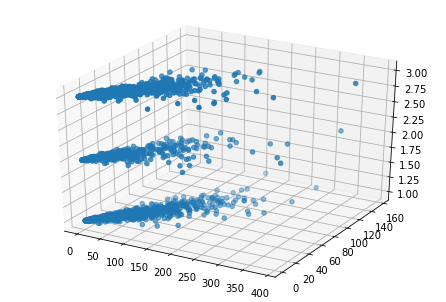

In [428]:
# raw data visualization
# choose three major dimension to plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1['SPEND'], df1['counts'],df1['lifestage'])

In [438]:
# choose the value of K
# elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df1)
    distortions.append(sum(np.min(cdist(df1, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

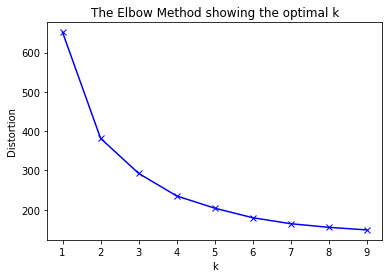

In [439]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the picture, we can see a smooth curve and the optimal value of  𝐾  is unclear. That means the data is not very clustered. The possible reasons are:
- Insufficient sample size. If we apply the "customer_data_large.csv", it may be better
- The classification of lifestage and sensitivity is not precise,such as "unclassified=xx"
- Feature dimensions of the sample are not enough. If involves the variables of gender, income and age, customer profile and classification will be more clearer
- Standardlize is necessary

Anyway, the clustering here does not need to be as precise as the species classification of Iris(classic example of machine learning). We just want to know the main customer groups of the store and formulate the corresponding sales strategy.So we can go ahead. Choose 4 as the parameter k because the marginal error after 4 does not decrease much.

In [450]:
# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(df1)
# Getting the cluster labels
labels = kmeans.predict(df1)
print('The labels associated with the observations are:')
print(labels)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print('The centroids associated with the clusters are:') 
print("|    spend   |     counts    |   lifestage | sensitivity")
print("--------------------------------------------------------")
print(centroids)

The labels associated with the observations are:
[0 0 1 ... 1 1 0]
The centroids associated with the clusters are:
|    spend   |     counts    |   lifestage | sensitivity
--------------------------------------------------------
[[ 51.75885673  27.3024602    2.12301013   2.00868307]
 [105.73443005  52.60362694   1.94300518   2.05958549]
 [ 13.23202809   8.46356453   2.23353819   2.13520632]
 [187.34213675  77.82905983   1.8974359    2.09401709]]


In [455]:
# Calculate the quantity of each type
from collections import Counter
arr = Counter(labels)
arr

Counter({0: 692, 1: 387, 2: 1137, 3: 117})

### Conclusion
- All the types' sensitivity is around 2. This means the mid market is the most significant. Our pricing should not be too high or too low. 
- Young group speand much more than the elder group. We should introduce some discount measures to stimulate young people's consumption, such as student discounts, couple discounts, etc.
- As for the elder group, lower consumption mainly because the number of visits. Therefore, we should enrich the variety of products to meet the purchasing needs of the elderly.
- the tyoe II customers in clustering contribute the most to sales revenune, We can identify such customers through future purchase data, and attract them to continue to consume through the membership system. We can even ask them about the shopping satisfaction and improvement opinions of stores. 